# General Information
>
>Author: Lucas Lobianco De Matheo
>
>Title: **Melbourne Housing Market**  
> - Melbourne housing clearance data from Jan 2016
>
>  
>*This dataset was obtained from Kaggle*
>
> **Kaggle Context:**  
> This data was scraped from publicly available results posted every week from domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.
>
>**Extension:** .csv
>
>**Source:** https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market  
>
>**Date:** 04-08-2022
>
> **Main Skills of this project:** 
> - **Machine Learning**
> - **Forecasting**  
> - **Time Series** 
> - **Regression**
> - **Data Visualization**

# Objective
> Understand the behavior of the realestate market  
> Predict future prices

# Importing Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None

# Importing Data

In [3]:
path = r'C:\Users\lucas\OneDrive\Documents\TI\DataScience\Projects\Melbourne Housing Market\Data_for_ML_MelbourneHousingMarket.csv'
df = pd.read_csv(path)

In [4]:
df

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,TypeCat,PostCodeCat,CouncilAreaCat,PropertycountCat,Date
0,2.0,1.035000e+06,2.5,2.0,1.0,0.0,79.0,1900.0,5.0,4.0,6.0,4.0,2016-02-04
1,3.0,1.465000e+06,2.5,3.0,2.0,0.0,150.0,1900.0,5.0,4.0,6.0,4.0,2017-03-04
2,4.0,1.600000e+06,2.5,3.0,1.0,2.0,142.0,2014.0,5.0,4.0,6.0,4.0,2016-06-04
3,4.0,1.400000e+06,2.5,3.0,2.0,2.0,220.0,2006.0,5.0,4.0,6.0,4.0,2016-08-06
4,3.0,1.876000e+06,2.5,4.0,2.0,0.0,210.0,1910.0,5.0,4.0,6.0,4.0,2016-05-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12748,3.0,5.700000e+05,25.5,3.0,2.0,2.0,158.0,2012.0,5.0,2.0,3.0,2.0,2018-02-24
12749,3.0,5.213333e+05,25.5,3.0,2.0,2.0,135.0,2016.0,5.0,2.0,3.0,2.0,2018-02-24
12750,2.0,8.880000e+05,6.3,2.0,2.0,1.0,104.0,2018.0,5.0,3.0,4.0,3.0,2018-02-24
12751,2.0,7.050000e+05,6.3,2.0,1.0,2.0,120.0,2000.0,2.0,3.0,4.0,3.0,2018-02-24


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12753 entries, 0 to 12752
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rooms             12753 non-null  float64
 1   Price             12753 non-null  float64
 2   Distance          12753 non-null  float64
 3   Bedroom2          12753 non-null  float64
 4   Bathroom          12753 non-null  float64
 5   Car               12753 non-null  float64
 6   BuildingArea      12753 non-null  float64
 7   YearBuilt         12753 non-null  float64
 8   TypeCat           12753 non-null  float64
 9   PostCodeCat       12753 non-null  float64
 10  CouncilAreaCat    12753 non-null  float64
 11  PropertycountCat  12753 non-null  float64
 12  Date              12753 non-null  object 
dtypes: float64(12), object(1)
memory usage: 1.3+ MB


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y/%m/%d') # Formatting Data

In [7]:
date_saved = df['Date']

# Preparing the first prediction via multiple regression

In [8]:
y = df['Price'] # target variable
X = df.drop('Price', axis=1) 
X = X.drop('Date', axis=1)

## Separating training from testing data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Multiple regression

In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [11]:
print(regr.coef_)

[ 79132.21478328 -14328.74833553   3342.87031924 119262.57392603
  30458.22726549   2348.57287056  -3459.38782471  67678.467669
  53740.22027507  58931.4724959   79954.07794747]


## Evaluating the model

In [12]:
X_test = X_test.reset_index()
X_test = X_test.drop('index', axis=1)

In [13]:
y_test = y_test.reset_index()
y_test = y_test.drop('index', axis=1)

In [14]:
predicted_ = []
for c in range(0, len(y_test)):
    predicted_.append(regr.predict(np.array(X_test.iloc[c]).reshape(1, -1)))


C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warni

C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warni

C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warni

C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warni

In [15]:
predicted = []
for c in predicted_:
    predicted.append(c[0])

In [16]:
test_df = X_test.copy()
test_df['Price'] = y_test

In [17]:
test_df['Predicted'] = predicted

In [18]:
test_df

,Rooms,Distance,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,TypeCat,PostCodeCat,CouncilAreaCat,PropertycountCat,Price,Predicted
0,4.0,18.0,4.0,2.0,2.0,221.0,2009.0,5.0,2.0,3.0,2.0,618350.0,8.679279e+05
1,5.0,8.4,5.0,2.0,3.0,199.0,1925.0,5.0,6.0,7.0,6.0,2260000.0,2.127840e+06
2,3.0,13.1,3.0,1.0,2.0,141.0,1960.0,5.0,2.0,2.0,2.0,775000.0,6.590938e+05
3,3.0,11.7,3.0,1.0,2.0,94.0,1950.0,1.0,3.0,6.0,3.0,851500.0,7.020713e+05
4,2.0,13.4,2.0,1.0,1.0,55.0,1960.0,1.0,4.0,6.0,4.0,485000.0,5.722852e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3821,3.0,34.9,3.0,2.0,2.0,132.0,1999.0,5.0,2.0,3.0,2.0,630000.0,3.688678e+05
3822,3.0,10.5,3.0,2.0,2.0,222.0,2013.0,5.0,7.0,7.0,7.0,2020000.0,1.785627e+06
3823,3.0,29.8,3.0,1.0,1.0,124.0,1970.0,5.0,1.0,2.0,1.0,361000.0,1.811315e+05
3824,4.0,12.4,4.0,2.0,3.0,138.0,1972.0,5.0,4.0,6.0,4.0,1030000.0,1.355876e+06


C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x504 with 0 Axes>

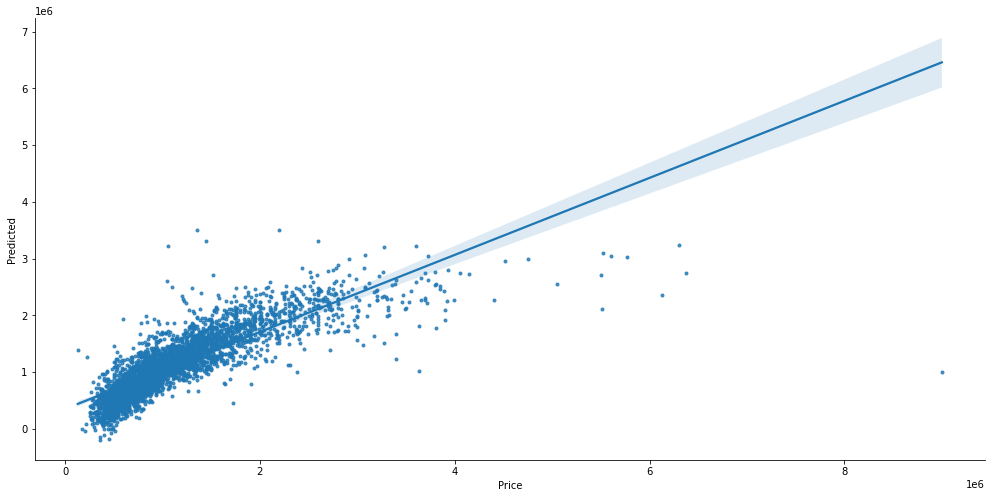

In [19]:
plt.figure(figsize = (15,7))
sns.pairplot(test_df, hue=None, hue_order=None, palette='tab10', vars=None, x_vars='Price', y_vars='Predicted', 
             kind='reg', diag_kind='auto', markers='.', height=2.5, aspect=2, 
             corner=False, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=7)
plt.show()

In [20]:
x = np.array(test_df['Price']).reshape((-1, 1))
y = np.array(test_df['Predicted'])

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)

In [21]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.6973150490213902
intercept: 348476.7308459524
slope: [0.6789743]


In [22]:
test_df

,Rooms,Distance,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,TypeCat,PostCodeCat,CouncilAreaCat,PropertycountCat,Price,Predicted
0,4.0,18.0,4.0,2.0,2.0,221.0,2009.0,5.0,2.0,3.0,2.0,618350.0,8.679279e+05
1,5.0,8.4,5.0,2.0,3.0,199.0,1925.0,5.0,6.0,7.0,6.0,2260000.0,2.127840e+06
2,3.0,13.1,3.0,1.0,2.0,141.0,1960.0,5.0,2.0,2.0,2.0,775000.0,6.590938e+05
3,3.0,11.7,3.0,1.0,2.0,94.0,1950.0,1.0,3.0,6.0,3.0,851500.0,7.020713e+05
4,2.0,13.4,2.0,1.0,1.0,55.0,1960.0,1.0,4.0,6.0,4.0,485000.0,5.722852e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3821,3.0,34.9,3.0,2.0,2.0,132.0,1999.0,5.0,2.0,3.0,2.0,630000.0,3.688678e+05
3822,3.0,10.5,3.0,2.0,2.0,222.0,2013.0,5.0,7.0,7.0,7.0,2020000.0,1.785627e+06
3823,3.0,29.8,3.0,1.0,1.0,124.0,1970.0,5.0,1.0,2.0,1.0,361000.0,1.811315e+05
3824,4.0,12.4,4.0,2.0,3.0,138.0,1972.0,5.0,4.0,6.0,4.0,1030000.0,1.355876e+06


# Evaluating other possibilities

In [23]:
df.columns.values

array(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'BuildingArea', 'YearBuilt', 'TypeCat', 'PostCodeCat',
       'CouncilAreaCat', 'PropertycountCat', 'Date'], dtype=object)

In [24]:
y = df['Price']
X = df.drop('Price', axis=1)
#X = X.drop('Date', axis=1)
#X = df[['PropertycountCat']] # to investigate each attribute individualy

#X = df[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'BuildingArea', 'PostCodeCat', 'CouncilAreaCat', 'PropertycountCat']]
#X = df[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'BuildingArea', 'YearBuilt', 'TypeCat', 'PostCodeCat','CouncilAreaCat', 'PropertycountCat']]
X = df[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'BuildingArea', 'YearBuilt', 'TypeCat', 'PostCodeCat','CouncilAreaCat', 'PropertycountCat']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

X_test = X_test.reset_index()
X_test = X_test.drop('index', axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop('index', axis=1)

predicted_ = []
for c in range(0, len(y_test)):
    predicted_.append(regr.predict(np.array(X_test.iloc[c]).reshape(1, -1)))
    
predicted = []
for c in predicted_:
    predicted.append(c[0])
    
test_df = X_test.copy()
test_df['Price'] = y_test

test_df['Predicted'] = predicted

C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warni

C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warni

C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warni

C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warni

C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x504 with 0 Axes>

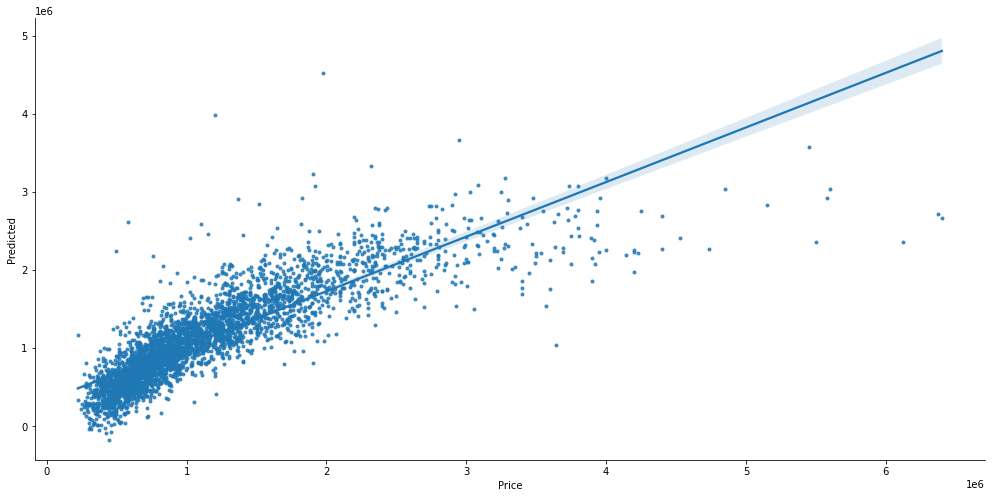

In [25]:
plt.figure(figsize = (15,7))
sns.pairplot(test_df, hue=None, hue_order=None, palette='tab10', vars=None, x_vars='Price', y_vars='Predicted', 
             kind='reg', diag_kind='auto', markers='.', height=2.5, aspect=2, 
             corner=False, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=7)
plt.show()

In [26]:
x = np.array(test_df['Price']).reshape((-1, 1))
y = np.array(test_df['Predicted'])

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.718829499917345
intercept: 329847.1908055559
slope: [0.6990721]


In [27]:
test_df

,Rooms,Distance,Bedroom2,Bathroom,BuildingArea,YearBuilt,TypeCat,PostCodeCat,CouncilAreaCat,PropertycountCat,Price,Predicted
0,3.0,11.2,3.0,3.0,145.0,1960.0,5.0,2.0,4.0,2.0,730000.0,1.039161e+06
1,5.0,16.7,5.0,3.0,325.0,2015.0,5.0,4.0,6.0,4.0,1670167.0,1.778229e+06
2,4.0,3.5,4.0,3.0,185.0,2016.0,5.0,4.0,6.0,4.0,2300000.0,1.510233e+06
3,3.0,6.7,3.0,1.0,109.0,2011.0,2.0,3.0,4.0,3.0,690000.0,5.270864e+05
4,4.0,15.5,4.0,2.0,180.0,2000.0,2.0,4.0,4.0,4.0,1000000.0,9.588482e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
3821,2.0,5.0,2.0,1.0,107.0,1950.0,1.0,3.0,6.0,3.0,701000.0,7.260235e+05
3822,2.0,4.2,2.0,1.0,88.0,1915.0,5.0,3.0,6.0,3.0,825000.0,1.081653e+06
3823,3.0,13.7,3.0,2.0,120.0,1999.0,2.0,5.0,7.0,6.0,917000.0,1.136178e+06
3824,4.0,28.8,4.0,2.0,183.0,2013.0,5.0,2.0,3.0,2.0,707000.0,6.258727e+05


PropertycountCat: 0.39  
PostCodeCat: 0.35   
BuildingArea: 0.30   

CouncilAreaCat: 0.26    
Room: 0.23  
Bedroom2: 0.22  
Bathroom: 0.20          

TypeCat: 0.12   
YearBuilt: 0.09  
Distance: 0.06  
Car: 0.04 - Removed  

Multiple: 0.71

> **This model explains 70% of what influences the price of apartments, being useful for estimating the price of an apartment.**